In [ ]:
%autosave 10

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Task 1 Data set/cleaned_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   26664 non-null  int64
 1   SEX                         26664 non-null  int64
 2   EDUCATION                   26664 non-null  int64
 3   MARRIAGE                    26664 non-null  int64
 4   AGE                         26664 non-null  int64
 5   PAY_1                       26664 non-null  int64
 6   PAY_2                       26664 non-null  int64
 7   PAY_3                       26664 non-null  int64
 8   PAY_4                       26664 non-null  int64
 9   PAY_5                       26664 non-null  int64
 10  PAY_6                       26664 non-null  int64
 11  BILL_AMT1                   26664 non-null  int64
 12  BILL_AMT2                   26664 non-null  int64
 13  BILL_AMT3                   26664 non-null  int64
 14  BILL_A

In [3]:
df.drop(["EDUCATION_CAT","ID"],axis = 1,inplace =True)

In [5]:
X = df.drop("default payment next month",axis = 1)
y = df["default payment next month"]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [9]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.82103588, 0.17896412],
       [0.87087055, 0.12912945],
       [0.85944884, 0.14055116],
       ...,
       [0.63150386, 0.36849614],
       [0.69089458, 0.30910542],
       [0.72392854, 0.27607146]])

In [10]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [12]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve
roc_auc_score(y_test,y_pred_prob[:,1])

0.6453460837092901

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'Receiver Operating Characteristic - Logistic regression')

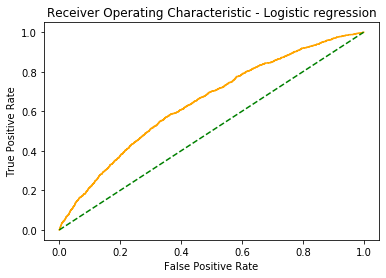

In [13]:
precision,recall,threshold = roc_curve(y_test,y_pred_prob[:,1])
plt.plot(precision,recall,label="ROC curve",color = "orange")
plt.plot([0, 1],[0,1],"g--",label="marker line")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic regression')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [18]:
precision_recall_curve(y_test,y_pred)


(array([0.22075, 0.     , 1.     ]),
 array([1., 0., 0.]),
 array([0, 1], dtype=int64))

In [17]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

(array([0.7792224, 0.       ]),
 array([0.99983959, 0.        ]),
 array([0.87585189, 0.        ]),
 array([6234, 1766], dtype=int64))

_______________________________________________
**Plot the precision-recall curve using matplotlib.**
pre -> precision
rec -> recall
thresh -> threshold

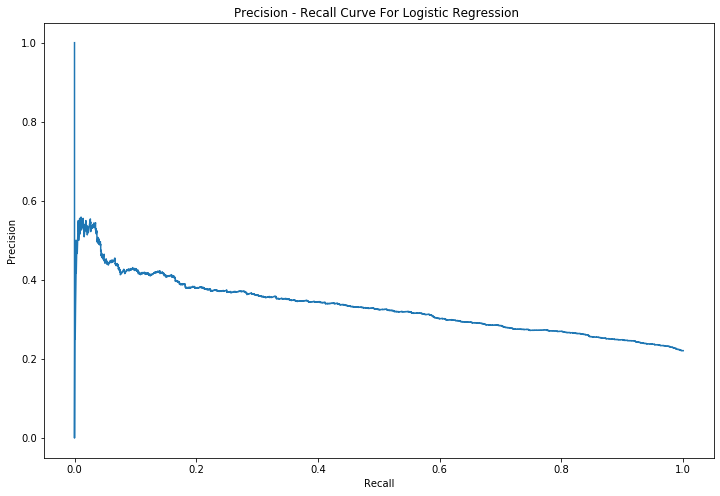

In [19]:
pre,rec,thresh = precision_recall_curve(y_test,y_pred_prob[:,1])
plt.figure(figsize = (12,8))
plt.plot(rec,pre)
plt.title('Precision - Recall Curve For Logistic Regression ')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [20]:
from sklearn.metrics import auc
auc(rec,pre)

0.33104763281714056

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [21]:
ytrain_prob = model.predict_proba(X_train)
roc_auc_score(y_train,ytrain_prob[:,1])

0.6452631127212933

    How is this different, conceptually and quantitatively, from your earlier calculation?
